In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from scipy import interpolate




In [3]:
path_dir = "C:\\Users\\Modern\\Desktop\Python\\Magnetic_field_processing\\Side system 2"
# file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[], 'Z':[]})

for address, dirs, files in os.walk(path_dir):
    for file in files:
        if ".dat" in str(file):
            z = re.search(r'([0-9]+)',file)
            z_coord = z[0]
            file_path = os.path.join(address,file)

            field_i = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])
            field_i['Z'] = int(z_coord)
            # print(z_coord)

            fields_df = pd.concat([fields_df,field_i])
            # print(field_i['B'])





In [4]:
fields_res = fields_df[fields_df['B']>1]


fig = px.scatter_3d(fields_df, x='X', y='Y', z='Z', color='B', opacity=0.8, color_continuous_scale='Spectral_r')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


fig.update_traces(marker={'size': 2})

fig.show()

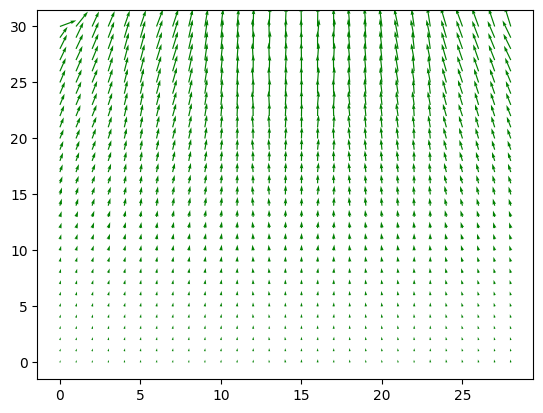

In [5]:
field_flat_xy = fields_df[fields_df['Z']==34].copy()
field_flat_xy_sorted = field_flat_xy.sort_values(by = ['X','Z'])
field_flat_np_xy = field_flat_xy_sorted.to_numpy()
field_flat_square_xy = np.reshape(field_flat_np_xy[:,0],(31,29))
 
xs = field_flat_xy_sorted['X'].drop_duplicates().to_numpy()
ys = field_flat_xy_sorted['Y'].drop_duplicates().to_numpy()


fig, ax = plt.subplots()
# plt.pcolormesh(xs, xs, field_flat_square_xy, cmap='Oranges')
# plt.colorbar()

dx,dy = np.gradient(field_flat_square_xy)
ax.quiver(ys, xs, dy*-1, dx*-1, color = 'green')

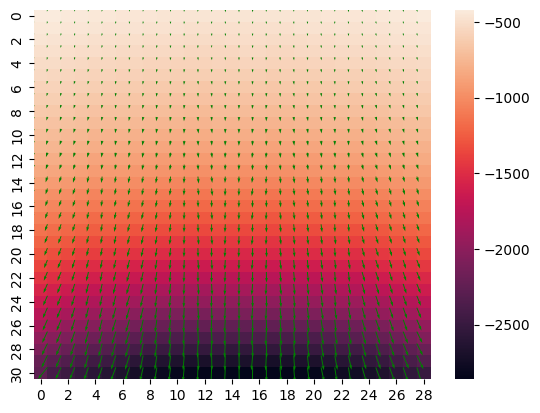

In [11]:
ax = sns.heatmap(field_flat_square_xy)
ax.quiver(ys, xs, dy, dx, color = 'green')

In [49]:
fig = px.scatter(field_flat_xy, x='X', y='Y', color='B', opacity=1)
fig.update_traces(marker={'size': 10})
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)